# Predictive Analytics for Direct Marketing Campaign: A Banking Case Study

by Gretel Tan, Yan Zeng, Charles Xu & Riya E. Shaju 2023/11/19

# Imports

In [1]:
from ucimlrepo import fetch_ucirepo 
import altair as alt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [1]:
from src.models.knn_model import KNNModel
from src.models.lr_model import LRModel
from src.models.svc_model import SVCModel
from src.models.rf_model import RFModel

ModuleNotFoundError: No module named 'models'

# Summary
In this project, we aimed to use customer information from a phone-call based direct marketing campaign of a Portugese banking institution to predict whether customers would subscribe to the product offered, a term deposit. We applied several classification based models (k-NN, SVM, logistic regression and random forest) to our dataset to find the model which best fit our data, eventually settling on the random forest model, which performed the best among all the models tested, with an F-beta score with beta = 5 of 0.817, and an accuracy of 0.671 on the test data.

While this was the best performing model out of the models tested, its accuracy still left much to be desired. This indicates that perhaps more data is needed to accurately predict whether customers would subscribe to the term deposit. Future studies may also consider using more features, a different set of features which might be more relevant to whether customers will subscribe, or utilising feature engineering to obtain features which might be more useful in helping to predict whether customers would subscribe to the service. 

# Introduction

Direct marketing generally refers to the relational marketing process involving getting information on individual consumers, getting feedback on their responses to various measures like sales campaigns, and influencing their behaviours (Bauer & Miglautsch, 1992). Many companies utilise direct marketing strategies to target individual groups of customers, reaching out specifically to groups of customers who will allow companies to meet their sales or business objectives (Moro et al., 2014), such as targeting advertising for a particular product to a specific group of customers who will be most likely to purchase that product. With the advent of rapidly advancing computer and database technologies, as well as the growing field of data science, companies and direct marketers now have unprecedented access to individual-level consumer information, which can be used to develop detailed customer profiles. These profiles are valuable to companies, providing them with great insight to guide the formulation of direct marketing campaigns, among other business strategies (Nowak & Phelps, 1995). As such, companies are keen to utilise technology to revolutionise marketing, using the information and metrics available to them to maximise the value they can get from each consumer over their lifetimes (Moro et al., 2014).

Our project aims to predict whether individual customers will subscribe to a service provided by a company, based on demographic information collected about each customer. Should the model be good enough to predict whether customers are likely to subscribe to the service accurately, the company, a Portugese banking institution, would be able to target ads and marketing phone calls only at the new customers who are most likely to subscribe to this service, or similar services. This would result in huge savings in terms of company resources, freeing up campaign funds and human resources, which might have otherwise been wasted on calling reluctant customers, to be redirected to other services which might benefit the company more. It might also reduce annoyance in customers, as, ideally customers will only receive calls if they are likely to be interested in a product, and would not have to entertain calls or ads about products which they do not care about. This presents a win-win situation for both consumers and the company.

# Methods

## Data

In this project, a dataset about direct marketing campaigns of a Portugese banking institution, from Sérgio Moro, P. Rita, and P. Cortez was used (Moro, S., Rita, P., and Cortez, P. 2012). The data was downloaded from UC Irvine's Machine Learning Repository, and the link can be found here: https://archive.ics.uci.edu/dataset/222/bank+marketing. The dataset has 16 features and 45211 instances, with each row representing information about a single client of the Portugese bank. The aim of the authors in creating the data set was to predict whether the client will subscribe a term deposit, which is captured by the 'subscribed' column. We have also used this column as our target in our analysis.


## Analysis
As our project is interested answering a classification problem, we decided to test different classification models to predict whether customers would subscribe to the term deposit. The models we chose to use are: the k-nearest neighbours (kNN), support vector machine (SVM), logistic regression, and random forest. We chose these models as they offer different benefits, and we were interested in finding out which model would work best for our data. We chose to include logistic regression as it offers both interpretability and potential to perform well in classification problems, while we chose the other models despite their lower interpretability as, in our case, it is not so critical that we understand why or how the model comes to its predictions as long as the model performs well. All variables from the original dataset except poutcome and contact were used to fit our models. 60% of the data was partitioned into the training set, and 40% of the data was partitioned into the test set, used for evaluating how well our best model would perform on unseen data. We used 5-fold cross-validation with the F-beta score (beta = 5) as the classification metric. Beta was chosen as 5 for the F-beta score as we would like to focus on making accurate predictions for the customers who might be interested in subscribing to the term deposit, corresponding to a higher recall. This is as because we would rather have false positives and annoy some customers who might not be interested in subscribing to our service, than miss out on customers who might want to subscribe to the service (false negatives), which would cause the bank to lose a potential opportunity. Furthermore, customers who fit this profile are more likely to subscribe to similar services, and if they are accurately identified, the bank will be able to target them more specifically in future campaigns. Numeric variables were standardised immediately before model testing and fitting, while categorical variables were encoded via one-hot encoding. The Python programming language (Van Rossum and Drake 2009) was used to perform the analysis, with the following Python packages being used as well: numpy(Harris et al. 2020), Pandas (McKinney 2010), altair (VanderPlas, 2018), scikit-learn (Pedregosa et al. 2011), matplotlib (Hunter, 2017). 

# Results

We started our analysis by reading in the data from the repository. After doing exploratory data analysis of our data, we decided to drop the 'poutcome' and 'contact' features from our data, as there were many NaN values in the two feature columns for them, limiting the usefulness of these features in our model training and predictions. Plotting histograms of the features, coloured by class (whether the customer subscribed or not) revealed that the features were sufficiently differently distributed for us to be confident that we should include all other features in training our models. We also identified that there was great class imbalance in our target. As such, we decided not to use accuracy as the metric used to evaluate our model, as it would not give us a good idea of whether the model is performing well or not, preferring to use the F-beta score (beta = 5) instead. 

## Reading in Data

In [3]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# bank marketing data
X = bank_marketing.data.features
y = bank_marketing.data.targets

# write raw data "data/raw" directory
X.to_csv("data/raw/bank_marketing_train.csv")
y.to_csv("data/raw/bank_marketing_test.csv")

# concat features and targets
bank_marketing_data = pd.concat([X, y], axis=1)

In [4]:
# rename target 'y' as 'subscribed'
bank_marketing_data.rename(columns={'y': 'subscribed'}, inplace=True)

# create a preliminary split to explore data
bank_marketing_train, bank_marketing_test = train_test_split(
    bank_marketing_data, train_size=0.60, stratify=bank_marketing_data["subscribed"]
)

bank_marketing_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscribed
22075,47,technician,married,secondary,no,644,no,no,telephone,21,aug,169,13,-1,0,NaN,no
10139,49,entrepreneur,married,tertiary,no,384,no,no,NaN,11,jun,64,1,-1,0,NaN,no
6540,33,management,married,tertiary,no,1657,yes,no,NaN,27,may,342,4,-1,0,NaN,no
21664,45,blue-collar,married,primary,no,487,yes,no,cellular,19,aug,110,4,-1,0,NaN,no
37941,33,blue-collar,married,secondary,no,43,yes,no,cellular,14,may,332,2,358,2,failure,no


## Exploratory Data Analysis (EDA)

In [5]:
bank_marketing_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27126 entries, 22075 to 36356
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          27126 non-null  int64 
 1   job          26964 non-null  object
 2   marital      27126 non-null  object
 3   education    26024 non-null  object
 4   default      27126 non-null  object
 5   balance      27126 non-null  int64 
 6   housing      27126 non-null  object
 7   loan         27126 non-null  object
 8   contact      19221 non-null  object
 9   day_of_week  27126 non-null  int64 
 10  month        27126 non-null  object
 11  duration     27126 non-null  int64 
 12  campaign     27126 non-null  int64 
 13  pdays        27126 non-null  int64 
 14  previous     27126 non-null  int64 
 15  poutcome     5000 non-null   object
 16  subscribed   27126 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.7+ MB


In [6]:
bank_marketing_summary = bank_marketing_train.describe(include = 'all')
bank_marketing_summary

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscribed
count,27126.000000,26964,27126,26024,27126,27126.000000,27126,27126,19221,27126.000000,27126,27126.000000,27126.000000,27126.000000,27126.000000,5000,27126
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,5826,16390,13927,26644,NaN,15125,22732,17502,NaN,8361,NaN,NaN,NaN,NaN,2993,23953
mean,40.988240,NaN,NaN,NaN,NaN,1364.222148,NaN,NaN,NaN,15.832301,NaN,257.989199,2.755991,40.691514,0.592752,NaN,NaN
std,10.609519,NaN,NaN,NaN,NaN,2991.954848,NaN,NaN,NaN,8.334341,NaN,256.816442,3.055504,100.472787,2.527359,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,71.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,454.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1451.000000,NaN,NaN,NaN,21.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
# check for NAs
bank_marketing_train.isna().sum()

age                0
job              162
marital            0
education       1102
default            0
balance            0
housing            0
loan               0
contact         7905
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       22126
subscribed         0
dtype: int64

In [8]:
len(bank_marketing_train) # 60% of the dataset

27126

In [9]:
len(bank_marketing_data) # all the observations in the data

45211

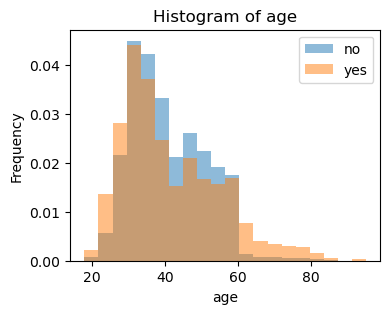

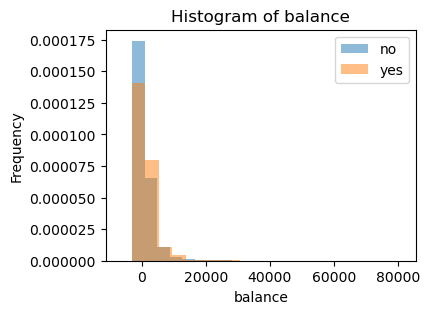

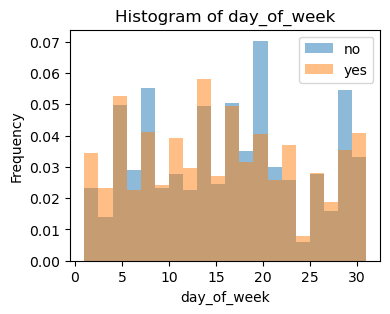

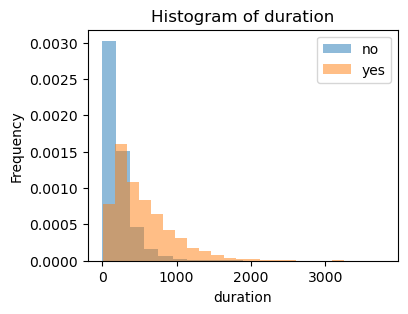

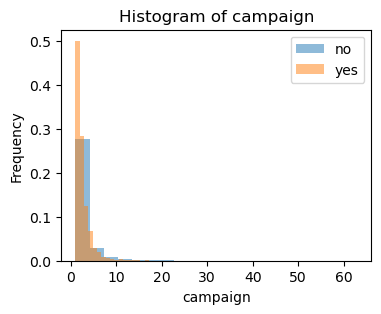

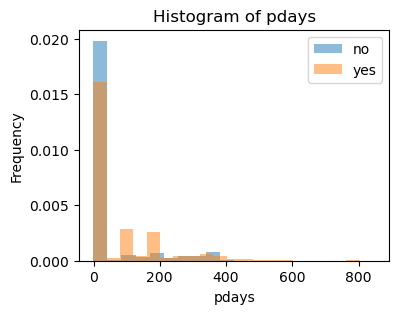

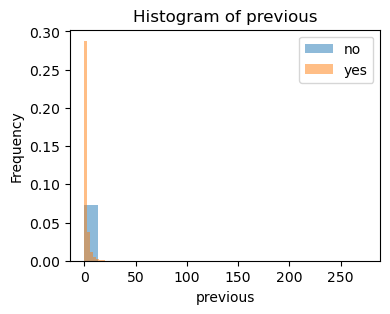

In [10]:
# distribution of numerical columns
numeric_cols = bank_marketing_train.select_dtypes(include=['number']).columns.to_list()
for i in numeric_cols:
    feature = i
    plt.figure(figsize=(4, 3))
    plot = bank_marketing_train.groupby("subscribed")[feature].plot.hist(bins=20, alpha = 0.5, legend = True, density = True, title = "Histogram of " + feature)
    plt.xlabel(feature)
    plt.show()

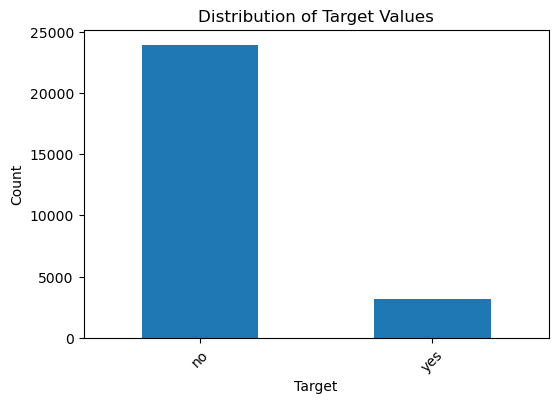

In [11]:
# target class imbalance
counts = bank_marketing_train["subscribed"].value_counts()
fig, ax = plt.subplots(figsize=(6, 4))
counts.plot(kind='bar', ax=ax)
ax.set_title('Distribution of Target Values')
ax.set_xlabel('Target')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
# distribution of NA values in all columns
# alt.data_transformers.enable('vegafusion')

# alt.Chart(
#     bank_marketing_train.isna().reset_index().melt(
#         id_vars='index'
#     )
# ).mark_rect().encode(
#     alt.X('index:O').axis(None),
#     alt.Y('variable').title(None),
#     alt.Color('value').title('NaN'),
#     alt.Stroke('value')
# ).properties(
#     width=bank_marketing_train.shape[0]
# )

In [13]:
# unique values in categorical columns
cat_cols = ["job", "marital", "education"]
for column in cat_cols:
    unique_values = list(bank_marketing_train[column].unique())
    print(f"{column}: {unique_values}")

job: ['technician', 'entrepreneur', 'management', 'blue-collar', 'retired', 'services', 'admin.', 'housemaid', 'student', 'unemployed', 'self-employed', nan]
marital: ['married', 'single', 'divorced']
education: ['secondary', 'tertiary', 'primary', nan]


# Preprocessing

In [14]:
# drop poutcome, contact - too many na values
bank_marketing_data = bank_marketing_data.drop(["poutcome", "contact"], axis = 1)
bank_marketing_data = bank_marketing_data.dropna()
bank_marketing_data

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,subscribed
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


In [15]:
# pre-process data (e.g., scale and split into train & test)
np.random.seed(522)
set_config(transform_output="pandas")

# create the split
bank_marketing_train, bank_marketing_test = train_test_split(
    bank_marketing_data, train_size=0.60, stratify=bank_marketing_data["subscribed"]
)

bank_marketing_train.to_csv("data/processed/bank_marketing_train.csv")
bank_marketing_test.to_csv("data/processed/bank_marketing_test.csv")

In [16]:
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital']
ordinal_features = ['education']
binary_features = ['default', 'housing', 'loan']
drop_features = ['day_of_week', 'month']
target = "subscribed"

In [17]:
X_train = bank_marketing_train.drop(columns=target)
y_train = bank_marketing_train[target]
X_test = bank_marketing_test.drop(columns=target)
y_test = bank_marketing_test[target]

In [18]:
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

education_order = ['primary', 'secondary', 'tertiary']
ordinal_transformer = OrdinalEncoder(categories=[education_order], dtype=int)

binary_transformer = OneHotEncoder(drop = 'if_binary', dtype=int, handle_unknown = "ignore", sparse_output=False)

In [19]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),  
    (categorical_transformer, categorical_features),
    ("drop", drop_features),  
)

preprocessor.fit(X_train)
preprocessed_X_train = preprocessor.transform(X_train)
preprocessed_X_test = preprocessor.transform(X_test)

# write raw data "data/processed" directory
preprocessed_X_train.to_csv("data/processed/preprocessed_X_train.csv")
preprocessed_X_test.to_csv("data/processed/preprocessed_X_test.csv")

preprocessed_X_train

,standardscaler__age,standardscaler__balance,standardscaler__duration,standardscaler__campaign,standardscaler__pdays,standardscaler__previous,ordinalencoder__education,onehotencoder-1__default_yes,onehotencoder-1__housing_yes,onehotencoder-1__loan_yes,...,onehotencoder-2__job_management,onehotencoder-2__job_retired,onehotencoder-2__job_self-employed,onehotencoder-2__job_services,onehotencoder-2__job_student,onehotencoder-2__job_technician,onehotencoder-2__job_unemployed,onehotencoder-2__marital_divorced,onehotencoder-2__marital_married,onehotencoder-2__marital_single
30605,-0.930271,-0.450231,0.103187,1.058207,-0.413999,-0.300386,1,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26394,-0.930271,-0.300735,-0.567378,-0.246847,0.887452,1.769685,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
36950,-0.261847,3.579522,0.743273,-0.246847,2.879672,6.427345,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14150,1.838917,0.287948,3.276944,-0.246847,-0.413999,-0.300386,2,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38910,0.311089,-0.336282,-0.917901,1.384470,-0.413999,-0.300386,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41344,1.361471,0.171673,-0.399737,-0.246847,0.527050,3.839756,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10384,-0.261847,-0.282131,-0.525468,-0.573111,-0.413999,-0.300386,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42552,1.743428,0.468008,-0.087314,-0.573111,1.658311,0.734650,2,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33759,-0.930271,-0.225654,-0.517848,-0.246847,3.029839,0.734650,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Model training

We did hyperparameter optimisation for the following classification models: k-nearest neighbouts classifier, support vector machine, logistic regression, and random forest model. To find the best model, we performed 5-fold cross validation within GridSearch using F-beta score (beta = 5) as our metric of model prediction performance.

In [20]:
model_comparison = { "model_name": [], "mean_train_score": [], "mean_test_score": [] }

### K-Nearest Neighbors

In [21]:
# tune model (here, find k for k-Nearest Neighbors classification using 5 fold cv)
knn = KNNModel(np.arange(1, 10, 2))
knn.set_preprocessor(preprocessor)
knn.search_cv(X_train, y_train)

(0.3614078586680282, {'kneighborsclassifier__n_neighbors': 1})

In [22]:
best_model_scores_knn = knn.get_best_model_score()
model_comparison["model_name"].append("K-Nearest Neighbors")
model_comparison["mean_train_score"].append(best_model_scores_knn["mean_train_score"])
model_comparison["mean_test_score"].append(best_model_scores_knn["mean_test_score"])

In [23]:
accuracies_grid_knn = knn.get_accuracy_grid()
accuracies_grid_knn

,k,mean_test_score,sem_test_score,sem_test_score_lower,sem_test_score_upper
0,1,0.361408,0.007098,0.357859,0.364957
1,3,0.302972,0.010859,0.297543,0.308401
2,5,0.290297,0.007882,0.286356,0.294238
3,7,0.281309,0.008024,0.277297,0.285321
4,9,0.262828,0.007445,0.259106,0.266550


In [24]:
knn.draw_search_plot()

alt.LayerChart(...)

### SVM

In [25]:
# tune model (here, find C for SVM model using 5 fold cv)
svc = SVCModel(np.arange(1, 10, 2))
svc.set_preprocessor(preprocessor)
svc.search_cv(X_train, y_train)

(0.7979368999361782, {'svc__C': 1})

In [26]:
best_model_scores_svc = svc.get_best_model_score()
model_comparison["model_name"].append("SVC RBF")
model_comparison["mean_train_score"].append(best_model_scores_svc["mean_train_score"])
model_comparison["mean_test_score"].append(best_model_scores_svc["mean_test_score"])

In [27]:
accuracies_grid_svc = svc.get_accuracy_grid()
accuracies_grid_svc

,C,mean_test_score,sem_test_score,sem_test_score_lower,sem_test_score_upper
0,1,0.797937,0.004704,0.795585,0.800289
1,3,0.770548,0.004886,0.768105,0.772991
2,5,0.752995,0.001621,0.752185,0.753806
3,7,0.738633,0.002326,0.737470,0.739796
4,9,0.725955,0.004284,0.723813,0.728098


In [28]:
svc.draw_search_plot()

alt.LayerChart(...)

### Logistic Regression

In [29]:
# tune model (here, find C for logistic regression using 5 fold cv)
lr = LRModel(10.0 ** np.arange(-3, 5, 1))
lr.set_preprocessor(preprocessor)
lr.search_cv(X_train, y_train)

(0.7774368662350466, {'logisticregression__C': 0.001})

In [30]:
best_model_scores_lr = lr.get_best_model_score()
model_comparison["model_name"].append("Logistic Regression")
model_comparison["mean_train_score"].append(best_model_scores_lr["mean_train_score"])
model_comparison["mean_test_score"].append(best_model_scores_lr["mean_test_score"])

In [31]:
accuracies_grid_lr = lr.get_accuracy_grid()
accuracies_grid_lr

,C,mean_test_score,sem_test_score,sem_test_score_lower,sem_test_score_upper
0,0.001,0.777437,0.007850,0.773512,0.781362
3,1.0,0.777166,0.005560,0.774386,0.779946
4,10.0,0.777137,0.005545,0.774365,0.779910
5,100.0,0.777137,0.005545,0.774365,0.779910
6,1000.0,0.777137,0.005545,0.774365,0.779910
7,10000.0,0.777137,0.005545,0.774365,0.779910
2,0.1,0.776632,0.005775,0.773745,0.779520
1,0.01,0.775215,0.006968,0.771731,0.778699


In [32]:
lr.draw_search_plot()

alt.LayerChart(...)

### Random Forest

In [33]:
# tune model (here, find n_estimator and max_depth for random forest classifier using 5 fold cv)
rf = RFModel(n_estimators=[100, 200, 300, 400, 500], max_depth=[3, 5, 7, 15, None])
rf.set_preprocessor(preprocessor)
rf.search_cv(X_train, y_train)

(0.8360555452391051,
 {'randomforestclassifier__max_depth': 3,
  'randomforestclassifier__n_estimators': 200})

In [34]:
best_model_scores_rf = rf.get_best_model_score()
model_comparison["model_name"].append("Random Forest")
model_comparison["mean_train_score"].append(best_model_scores_rf["mean_train_score"])
model_comparison["mean_test_score"].append(best_model_scores_rf["mean_test_score"])

In [35]:
accuracies_grid_rf = rf.get_accuracy_grid()
accuracies_grid_rf

,max_depth,n_estimators,mean_test_score,sem_test_score,sem_test_score_lower,sem_test_score_upper
1,3,200,0.836056,0.004531,0.833790,0.838321
4,3,500,0.834656,0.004218,0.832547,0.836765
2,3,300,0.834212,0.004734,0.831845,0.836579
0,3,100,0.831712,0.003094,0.830165,0.833259
3,3,400,0.831126,0.004234,0.829009,0.833243
7,5,300,0.826613,0.003082,0.825072,0.828154
6,5,200,0.825701,0.003987,0.823708,0.827695
8,5,400,0.823378,0.002878,0.821939,0.824818
5,5,100,0.822488,0.004310,0.820333,0.824643
9,5,500,0.822371,0.003608,0.820567,0.824175


# Model comparison

Out of the above models, the random forest model performed the best, with its best, hyperparameter-optimised model having a mean test score of 0.833765, which was the highest mean test score for the optimised models. We thus decided to use the random forest model for our final predictions with the test data.

In [36]:
pd.DataFrame(model_comparison)

,model_name,mean_train_score,mean_test_score
0,K-Nearest Neighbors,0.538419,0.302972
1,SVC RBF,0.869291,0.770548
2,Logistic Regression,0.778668,0.777166
3,Random Forest,0.838107,0.834656


# Prediction

The random forest model performed similarly on the test data when compared to the training data, having an F-beta score (beta = 5) of 0.817092 on the test data. This was only slightly lower than the mean test score of the best model after cross validation using the training data, which was 0.833765. This relatively high F-beta score and the small gap between the scores indicates that the model is quite good at predicting whether customers will subscribe to the term deposit, and is likely to generalise well to unseen data. It had quite a low accuracy, with 5492 false positives out of the 1807 actual positives. This is expected as we heavily favoured recall, and acceptable as the high number of false positives is not of large consequence to the bank.

In [37]:
# Compute accuracy
rf.fit(X_train, y_train)
bank_marketing_fit = rf.model
y_pred = bank_marketing_fit.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Compute F-beta score (beta = 5)
bank_marketing_preds = X_test.assign(
    predicted=bank_marketing_fit.predict(X_test)
)
f_beta_5_score = fbeta_score(
    y_test,
    bank_marketing_preds['predicted'],
    beta=5,
    pos_label='yes'
)

pd.DataFrame({'accuracy': [accuracy], 'F-beta score (beta = 5)': [f_beta_5_score]})

,accuracy,F-beta score (beta = 5)
0,0.661419,0.824159


In [38]:
pd.crosstab(
    y_test,
    bank_marketing_preds['predicted'],
)

predicted,no,yes
subscribed,,
no,9599,5671
yes,179,1829


# Discussion

As the F-beta score (beta = 5) score of the model is quite high and the model does not seem to be overfit to the training data, it is probably safe to apply this model to new customers, and to predict whether they will be interested in subscribing to the term deposit. This means that the bank can target ads and direct marketing calls about this term deposit, and potentially, other related products, to this specific group of customers, and can expect that the success rate would be quite high compared to a random group of customers.

While the high number of false positives is acceptable given the low-stakes nature of having false positives, it would still be beneficial to the bank to improve the performance of our model, and to reduce the number of false positives. In the future, the model may be refined by including more data points, which might help to train the model better. More relevant features may also be included to train the model better, and feature engineering may be carried out to further refine the model.

# References 
- Bauer, C. L., &amp; Miglautsch, J. (1992). A conceptual definition of direct marketing. Journal of Direct Marketing, 6(2), 7–17. https://doi.org/10.1002/dir.4000060204 
- Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362.
- Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science &amp; Engineering, 9(3), 90–95.
- McKinney, Wes. 2010. “Data Structures for Statistical Computing in Python.” In Proceedings of the 9th Python in Science Conference, edited by Stéfan van der Walt and Jarrod Millman, 51–56.
- Moro, S., Cortez, P., &amp; Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22–31. https://doi.org/10.1016/j.dss.2014.03.001 
- Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306. 
- Nowak, G. J., &amp; Phelps, J. (1995). Direct marketing and the use of individual-level consumer information: Determining how and when “privacy” matters. Journal of Direct Marketing, 9(3), 46–60. https://doi.org/10.1002/dir.4000090307
- Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
- VanderPlas, J. et al., 2018. Altair: Interactive statistical visualizations for python. Journal of open source software, 3(32), p.1057.
- Van Rossum, Guido, and Fred L. Drake. 2009. Python 3 Reference Manual. Scotts Valley, CA: CreateSpace.